In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal

Import all time arrays from the txt files.
Last element is removed as a time is always appended to the file with a comma at the end

In [5]:
basicTime4Deterministic = np.genfromtxt('timeBasicDepth4Deterministictrue.txt', dtype=float, delimiter=',')[:-1]
timeTranspostion4Deterministic = np.genfromtxt('timeTranspositionDepth4Deterministictrue.txt', dtype=float, delimiter=',')[:-1]
timeMoveOrdering4Deterministic = np.genfromtxt('timeMoveOrderingDepth4Deterministictrue.txt', dtype=float, delimiter=',')[:-1]
timeTranspostionMoveOrdering4Deterministic = np.genfromtxt('timeTranspositionMoveOrderingDepth4Deterministictrue.txt', dtype=float, delimiter=',')[:-1]

basicTime4Stochastic = np.genfromtxt('timeBasicDepth4Deterministicfalse.txt', dtype=float, delimiter=',')[:-1]
timeTranspostion4Stochastic = np.genfromtxt('timeTranspositionDepth4Deterministicfalse.txt', dtype=float, delimiter=',')[:-1]
timeMoveOrdering4Stochastic = np.genfromtxt('timeMoveOrderingDepth4Deterministicfalse.txt', dtype=float, delimiter=',')[:-1]
timeTranspostionMoveOrdering4Stochastic = np.genfromtxt('timeTranspositionMoveOrderingDepth4Deterministicfalse.txt', dtype=float, delimiter=',')[:-1]

# Comparisons at Depth 4 Deterministic

Using mann whitney u to compare various configurations
We set an Alpha of 0.05 for this.

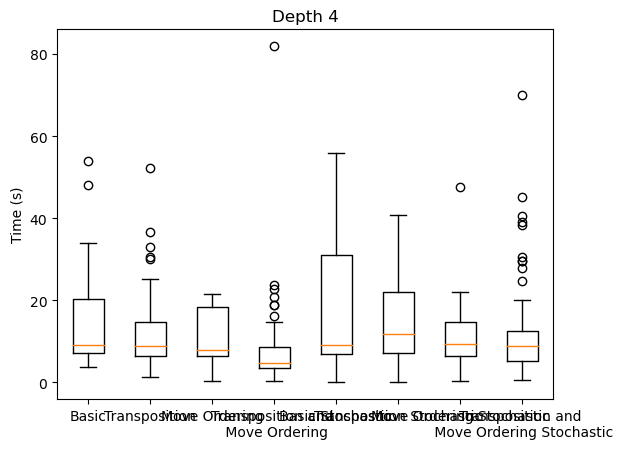

In [6]:
plt.figure()
plt.boxplot([basicTime4Deterministic, timeTranspostion4Deterministic, timeMoveOrdering4Deterministic, timeTranspostionMoveOrdering4Deterministic,basicTime4Stochastic, timeTranspostion4Stochastic, timeMoveOrdering4Stochastic, timeTranspostionMoveOrdering4Stochastic],
             labels=['Basic', 'Transposition', 'Move Ordering', 'Transposition and \n Move Ordering',  'Basic Stochastic', 'Transposition Stochastic', 'Move Ordering Stochastic'  ,'Transposition and \n Move Ordering Stochastic',])
plt.ylabel('Time (s)')
plt.title('Depth 4')
plt.show()


In [7]:
mannwhitneyu(timeTranspostion4Deterministic, basicTime4Deterministic, alternative='less')

MannwhitneyuResult(statistic=3062.0, pvalue=0.04325492467758234)

As p < Alpha we reject the null hypothesis and accept that using a transposition table in the case of a Depth of 4 and using a determinisitc simulation provides a statisticlly significant time improvement

In [36]:
mannwhitneyu(timeMoveOrdering4Deterministic, basicTime4Deterministic, alternative='less')

MannwhitneyuResult(statistic=1378.0, pvalue=0.029023027895720352)

As p < Alpha we reject the null hypothesis and accept that using move ordering in the case of a Depth of 4 and using a determinisitc simulation provides a statisticlly significant time improvement

In [37]:
mannwhitneyu(timeTranspostionMoveOrdering4Deterministic, timeTranspostion4Deterministic, alternative='less')

MannwhitneyuResult(statistic=4415.5, pvalue=1.5269142703794018e-10)

In [38]:
mannwhitneyu(timeTranspostionMoveOrdering4Deterministic, timeMoveOrdering4Deterministic, alternative='less')

MannwhitneyuResult(statistic=2148.0, pvalue=1.2249691427946014e-06)

As p < Alpha in both cases we reject the null hypthesis and accept that using both move ordering and a transposition table in the case of a Depth of 4 and using a deterministic simulaiton provides a statistically significant time improved over using either a transposition table or move ordering individually

# Comparisons at Depth 4 Stochastic

In [8]:
mannwhitneyu(basicTime4Stochastic, basicTime4Deterministic, alternative='two-sided')

MannwhitneyuResult(statistic=2362.0, pvalue=0.7738285405864233)

In comparing deterministic and stochastic simulation with all other settings equal using a two tailed hypothesis we see a p > Alpha and fail to reject to null hypothesis. This makes sense as including 'randomness' in the simulation should not be very computationally intensive.

In [9]:
mannwhitneyu(timeTranspostion4Stochastic, basicTime4Stochastic, alternative='less')

MannwhitneyuResult(statistic=1350.0, pvalue=0.36764133583755293)

Maybe need more data but as of now p > Alpha so we fail to reject the null hypothesis and cannot determine if a transposition table provides a statistically significant time improvement

In [12]:
mannwhitneyu(timeMoveOrdering4Stochastic, basicTime4Stochastic, alternative='less')

MannwhitneyuResult(statistic=823.0, pvalue=0.1106532583971297)

Maybe need more data but as of now p > Alpha so we fail to reject the null hypothesis and cannot determine if move ordering provides a statistically significant time improvement

In [15]:
mannwhitneyu(timeTranspostionMoveOrdering4Stochastic, timeTranspostion4Stochastic, alternative='less')

MannwhitneyuResult(statistic=1773.0, pvalue=0.026428707650760216)

From this we can determine that move ordering provides signigicant benefit using stochastic simualtion but using a transposition table does not. This makes sense as using stochastic simualtion reduces the chances to encounter the same state from multiple branches.

In [10]:
mannwhitneyu(timeTranspostionMoveOrdering4Stochastic, basicTime4Deterministic, alternative='less')

MannwhitneyuResult(statistic=2851.0, pvalue=0.008853386080643509)

In [11]:
kruskal(basicTime4Deterministic, timeTranspostion4Deterministic, timeTranspostionMoveOrdering4Deterministic)

KruskalResult(statistic=80.52902406027962, pvalue=3.2609535211215838e-18)